<a href="https://colab.research.google.com/github/ani12345678860/IMDB-movies-Pandas_2/blob/main/imdb_movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
movies_data=pd.read_csv('/content/drive/MyDrive/imdb-movies-dataset.csv') #Reading the file uploaded

In [33]:
movies_data.head() #First five rows of the dataset

,Poster,Title,Release Date,Budget,Revenue,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,16-07-2022,42110861,4886739,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,12-05-2023,14627858,7458541,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,20-04-2023,48805376,7814085,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,07-10-2022,28147070,4951558,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,05-01-2023,49549901,6891688,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [34]:
missing_values=movies_data.isnull().sum() #for null values in th dataset

In [35]:
missing_values

,0
Poster,0
Title,0
Release Date,0
Budget,0
Revenue,0
Certificate,2630
Duration (min),336
Genre,7
Rating,404
Metascore,2445


In [36]:
movies_data.dtypes

,0
Poster,object
Title,object
Release Date,object
Budget,int64
Revenue,int64
Certificate,object
Duration (min),float64
Genre,object
Rating,float64
Metascore,float64


In [37]:
movies_data['Release Date']=pd.to_datetime(movies_data['Release Date'],errors='coerce') #converting release date column to its correct format

<ipython-input-37-b14a1b39b620>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  movies_data['Release Date']=pd.to_datetime(movies_data['Release Date'],errors='coerce') #converting release date column to its correct format


In [38]:
movies_data['Release Date']

,Release Date
0,2022-07-16
1,2023-05-12
2,2023-04-20
3,2022-10-07
4,2023-01-05
...,...
9995,2023-02-11
9996,2022-08-19
9997,2023-05-06
9998,2022-12-29


In [39]:
movies_data['Votes'] = movies_data['Votes'].str.replace(',', '').astype(float, errors='ignore')

In [40]:
movies_data['Votes']

,Votes
0,28744.0
1,22248.0
2,18401.0
3,38953.0
4,32517.0
...,...
9995,16078.0
9996,14300.0
9997,740.0
9998,22447.0


In [41]:
movies_data['Budget'] = pd.to_numeric(movies_data['Budget'], errors='coerce')

In [42]:
movies_data['Budget']

,Budget
0,42110861
1,14627858
2,48805376
3,28147070
4,49549901
...,...
9995,40892520
9996,29174237
9997,39411922
9998,49927298


In [43]:
movies_data['Revenue'] = pd.to_numeric(movies_data['Revenue'], errors='coerce')

In [44]:
movies_data['Revenue']

,Revenue
0,4886739
1,7458541
2,7814085
3,4951558
4,6891688
...,...
9995,5496436
9996,5128209
9997,6770819
9998,5635966


In [45]:
movies_data.dropna(subset=['Release Date', 'Budget', 'Revenue'], inplace=True)

In [46]:
movies_data['Budget'].isna()

,Budget
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [47]:
movies_data['Primary Genre'] = movies_data['Genre'].str.split(',').str[0] #Split the genres column into individual genres

In [48]:
movies_data['Primary Genre']

,Primary Genre
0,Comedy
1,Action
2,Biography
3,Action
4,Drama
...,...
9995,Drama
9996,Animation
9997,Mystery
9998,Biography


In [49]:
movies_data['Genre_category'] = movies_data['Primary Genre'].astype('category').cat.codes

In [50]:
movies_data.head()

,Poster,Title,Release Date,Budget,Revenue,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review,Primary Genre,Genre_category
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2022-07-16,42110861,4886739,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,"Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",Comedy,4
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023-05-12,14627858,7458541,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,"Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",Action,0
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023-04-20,48805376,7814085,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,"In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...,Biography,3
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2022-10-07,28147070,4951558,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,Action,0
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023-01-05,49549901,6891688,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,"Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,Drama,7


In [51]:
movies_data['Certificate_category'] = movies_data['Certificate'].astype('category').cat.codes

In [52]:
movies_data['Certificate_category']

,Certificate_category
0,20
1,19
2,19
3,19
4,20
...,...
9995,21
9996,-1
9997,-1
9998,10


In [53]:
movies_data.dtypes

,0
Poster,object
Title,object
Release Date,datetime64[ns]
Budget,int64
Revenue,int64
Certificate,object
Duration (min),float64
Genre,object
Rating,float64
Metascore,float64


In [54]:
numerical_summary = movies_data[['Budget', 'Revenue', 'Rating', 'Votes']].describe()

In [55]:
numerical_summary

,Budget,Revenue,Rating,Votes
count,1.000000e+04,1.000000e+04,9596.000000,9.596000e+03
mean,2.818805e+07,5.992922e+06,6.438610,9.634588e+04
std,1.578402e+07,1.151588e+06,1.051412,1.820084e+05
min,1.004975e+06,4.001122e+06,1.300000,6.000000e+00
25%,1.440519e+07,4.995372e+06,5.800000,1.134650e+04
50%,2.801594e+07,6.009230e+06,6.500000,3.707250e+04
75%,4.204831e+07,6.983326e+06,7.200000,1.005052e+05
max,5.555545e+07,7.998826e+06,9.700000,2.894940e+06


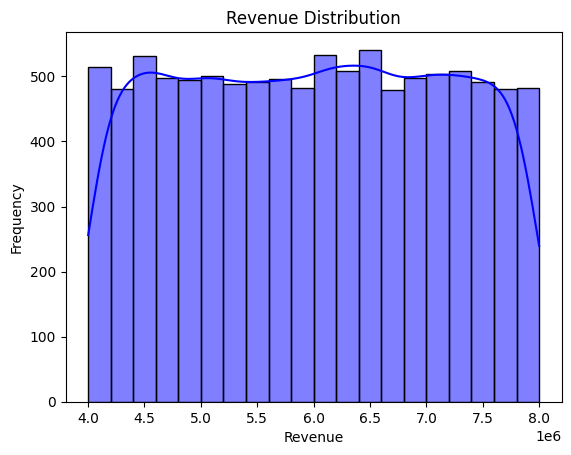

In [56]:
sns.histplot(movies_data['Revenue'], kde=True, bins=20, color='blue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

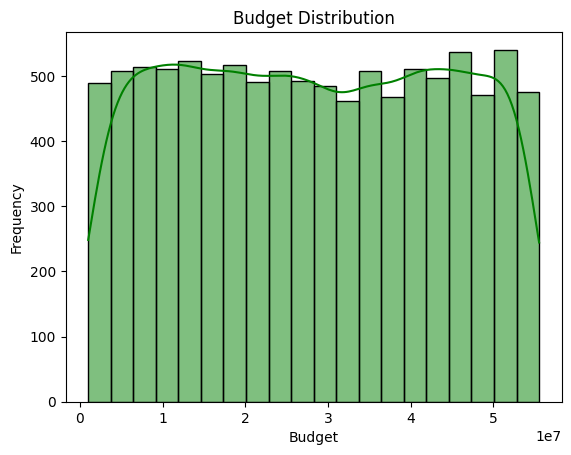

In [57]:
sns.histplot(movies_data['Budget'], kde=True, bins=20, color='green')
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

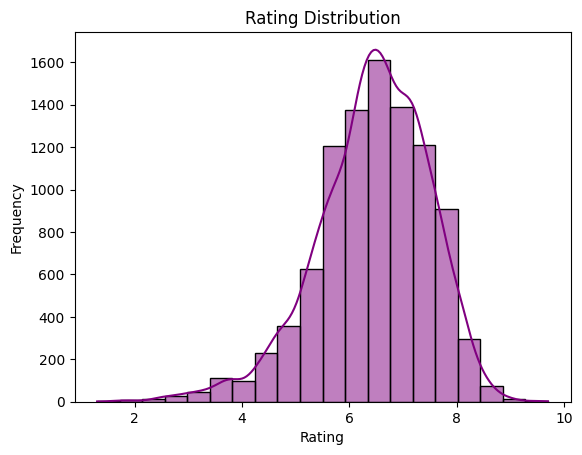

In [58]:
sns.histplot(movies_data['Rating'], kde=True, bins=20, color='purple')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [59]:
correlation_matrix = movies_data[['Budget', 'Revenue', 'Rating', 'Votes']].corr()

           Budget   Revenue    Rating     Votes
Budget   1.000000  0.006467 -0.007771 -0.016561
Revenue  0.006467  1.000000  0.012119  0.004203
Rating  -0.007771  0.012119  1.000000  0.368872
Votes   -0.016561  0.004203  0.368872  1.000000


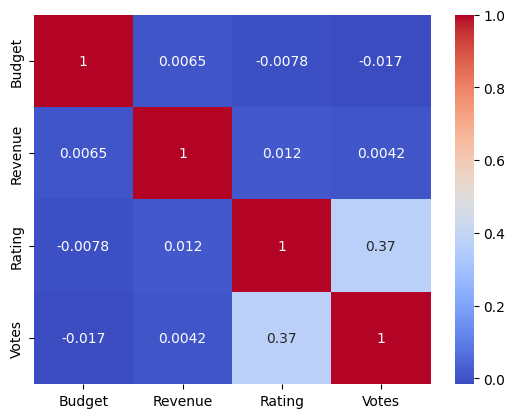

In [60]:
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [61]:
genre_performance = movies_data.groupby('Genre').agg(
    Total_Revenue=('Revenue', 'sum'),
    Average_Revenue=('Revenue', 'mean'),
    Count=('Revenue', 'count')
).sort_values(by='Total_Revenue', ascending=False)

In [62]:
print(genre_performance.head())


                        Total_Revenue  Average_Revenue  Count
Genre                                                        
Drama                      3051434526     6.054434e+06    504
Comedy, Drama, Romance     2180114333     5.924224e+06    368
Drama, Romance             2140809173     5.946692e+06    360
Comedy, Drama              1787862058     6.122815e+06    292
Comedy                     1779513221     5.892428e+06    302


In [63]:
top_5_movies = movies_data.sort_values(by='Revenue', ascending=False).head(5)

In [64]:
from tabulate import tabulate
print(tabulate(top_5_movies[['Title', 'Revenue', 'Genre', 'Budget', 'Director']], headers='keys', tablefmt='pretty'))

+------+-----------------------------------------------+---------+---------------------------+----------+--------------------+
|      |                     Title                     | Revenue |           Genre           |  Budget  |      Director      |
+------+-----------------------------------------------+---------+---------------------------+----------+--------------------+
| 5932 |              The Stepford Wives               | 7998826 |  Horror, Mystery, Sci-Fi  | 26628571 |    Bryan Forbes    |
| 8053 | Spacehunter: Adventures in the Forbidden Zone | 7998531 | Action, Adventure, Sci-Fi | 29418808 |   Lamont Johnson   |
| 2986 |                The Hate U Give                | 7997909 |       Crime, Drama        | 48049780 | George Tillman Jr. |
| 6741 |                 The Love Guru                 | 7997697 |  Comedy, Romance, Sport   | 43585827 |   Marco Schnabel   |
| 2345 |               Ocean's Thirteen                | 7997178 |      Crime, Thriller      | 40997329 | Steve

In [65]:
movies_data['Release Month'] = movies_data['Release Date'].dt.month
seasonal_trends = movies_data.groupby('Release Month').agg(
    Total_Revenue=('Revenue', 'sum'),
    Average_Revenue=('Revenue', 'mean'),
    Movie_Count=('Revenue', 'count')
).sort_values(by='Total_Revenue', ascending=False)

In [66]:
from tabulate import tabulate
print(tabulate(seasonal_trends, headers='keys', tablefmt='pretty'))

+---------------+---------------+-------------------+-------------+
| Release Month | Total_Revenue |  Average_Revenue  | Movie_Count |
+---------------+---------------+-------------------+-------------+
|       4       | 7384747129.0  | 5960247.884584342 |   1239.0    |
|       3       | 5634866161.0  | 5988168.077577046 |    941.0    |
|       5       | 5629497742.0  | 5995205.263045793 |    939.0    |
|      10       | 4961518475.0  | 5999417.744860943 |    827.0    |
|       1       | 4776172728.0  | 5985178.857142857 |    798.0    |
|       9       | 4649761959.0  | 6023007.718911917 |    772.0    |
|       8       | 4642459353.0  |     5998009.5     |    774.0    |
|       7       | 4605330363.0  | 5988726.089726918 |    769.0    |
|      12       | 4545113280.0  | 5956898.138925295 |    763.0    |
|       2       | 4485579605.0  | 6029004.845430108 |    744.0    |
|       6       | 4332520078.0  | 6009043.104022192 |    721.0    |
|      11       | 4281653040.0  | 6005123.478260

In [67]:
top_directors_df= movies_data['Director'].value_counts().head(10)

In [68]:
print(top_directors_df)

Director
Clint Eastwood       35
Steven Spielberg     33
Ridley Scott         28
Martin Scorsese      26
Steven Soderbergh    26
Ron Howard           26
Alfred Hitchcock     24
Woody Allen          22
Robert Zemeckis      21
Tim Burton           20
Name: count, dtype: int64


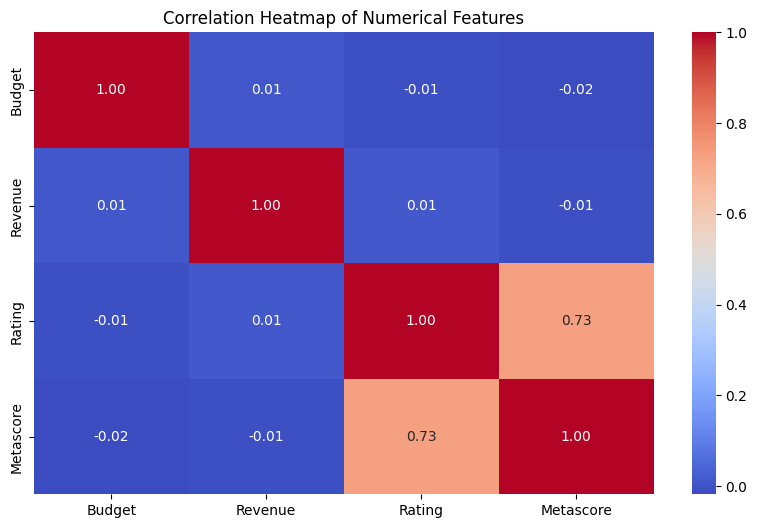

In [69]:
# Selecting numerical features for correlation analysis
numerical_features = movies_data[['Budget', 'Revenue', 'Rating', 'Metascore']]

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<ipython-input-70-f9d7f72a12e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies_data, x='Primary Genre', y='Rating', palette="Set3")


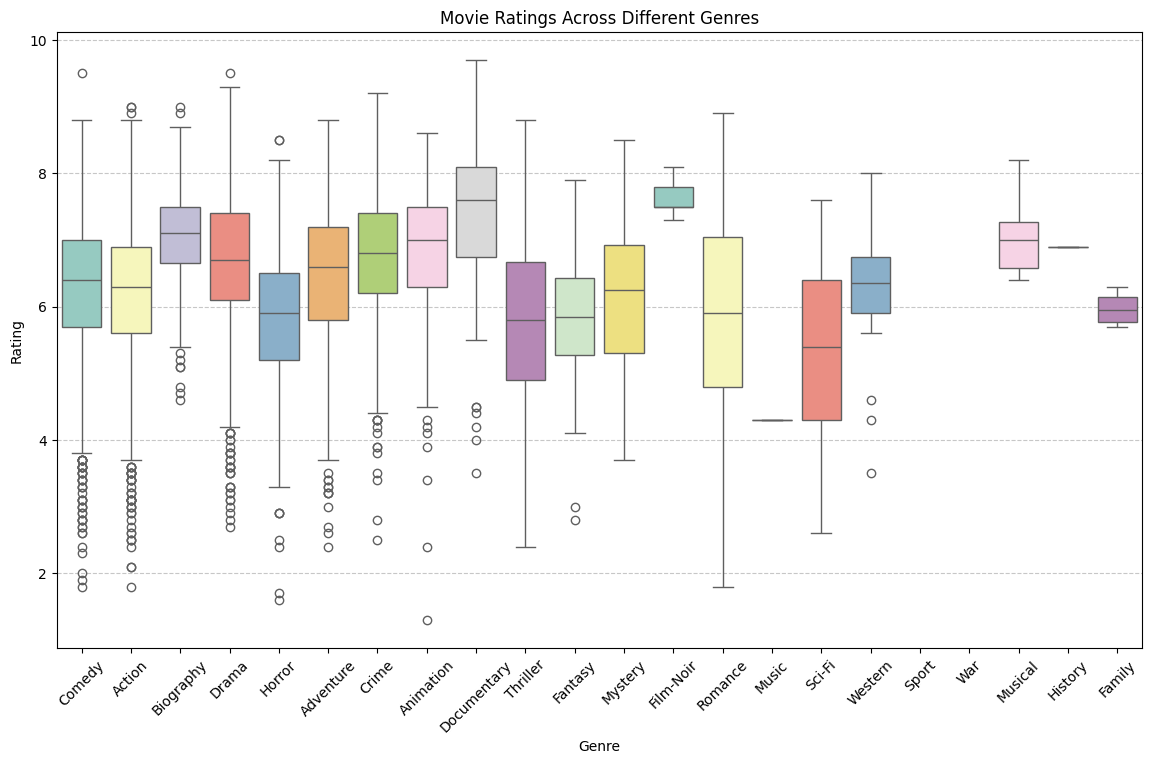

In [70]:
# Create a box plot for ratings across genres
plt.figure(figsize=(14, 8))
sns.boxplot(data=movies_data, x='Primary Genre', y='Rating', palette="Set3")

plt.title("Movie Ratings Across Different Genres")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()